## Подготовка данных для модели машинного обучения



В данном ноутбуке будет производится разведочный анализ данных предлагаемого датасета, а также будет проводиться подготовка к формированию итогового датасета, который будет использоваться для итоговых моделей.

В данном разделе будут проведены следующие действия:
- поиск и заполнение отсутствующих данных. 
- устранение нетипичных значений - выбросов. 
- устранение дубликатов и т.д. 

### Этап 1. Загрузка стандартных библиотек и загрузка датасета

In [87]:
## Импорт стандартных библиотек
import pandas as pd
import numpy as np

## Импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

## Прочие библиотеки
import warnings

Загрузка данных происходит из директории Data/Raw, где содержатся необработанные данные. Также после загрузки необходимо проверить общую струуктуру данных - сколько строк и столбцовв есть в датасете, проверить типы столбцов - необходимо проверить, являются ли они числовыми. 

Если столбцы числовыми не являются, то в одном случае можно применить энкодеры для кодировки текста в значения, в другом случае - просто поменять тип столбца на числовой. 

In [131]:
# Загрузка данных
df = pd.read_csv("Data/Raw/data.csv")
df = pd.DataFrame(df)
print(df.shape)
print(df.dtypes)

(11934, 18)
Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока          object
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                      object
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object


Датасет имеет порядка 12 тыс. строк и 18 столбцов. При этом два столбца - 'Температура выдоха Истока' и 'Древний Ветер' не являются числовыми столбцами. 

- Температура выдоха Истока - температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия.
- Древний Ветер - давление древней магической энергии, покидающей портал в виде выхлопного потока.

Нужно их рассмотреть подробнее.

In [132]:
df["Температура выдоха Истока"]

0        Исток не вернул выдох
1                      581.658
2        Исток не вернул выдох
3        Исток не вернул выдох
4                      645.642
                 ...          
11929                   628.95
11930    Исток не вернул выдох
11931                  680.393
11932    Исток не вернул выдох
11933    Исток не вернул выдох
Name: Температура выдоха Истока, Length: 11934, dtype: object

In [133]:
counts = df["Температура выдоха Истока"].value_counts()
counts

Температура выдоха Истока
Исток не вернул выдох    9547
635.572                     2
606.098                     2
565.712                     2
600.093                     2
                         ... 
691.172                     1
564.919                     1
637.581                     1
779.856                     1
680.393                     1
Name: count, Length: 2369, dtype: int64

In [134]:
df["Древний Ветер"].head(100)

0     Древний Ветер развеялся
1                       1.019
2     Древний Ветер развеялся
3     Древний Ветер развеялся
4                       1.026
               ...           
95    Древний Ветер развеялся
96    Древний Ветер развеялся
97    Древний Ветер развеялся
98                      1.049
99    Древний Ветер развеялся
Name: Древний Ветер, Length: 100, dtype: object

In [135]:
counts1 = df["Древний Ветер"].value_counts()
counts1

Древний Ветер
Древний Ветер развеялся    9547
1.019                       371
1.02                        348
1.026                       209
1.03                        192
1.023                       170
1.036                       145
1.042                       128
1.041                       124
1.035                       122
1.022                       109
1.031                        96
1.051                        81
1.05                         72
1.027                        72
1.049                        65
1.021                        44
1.052                        35
1.043                         3
1.04                          1
Name: count, dtype: int64

Данные столбцы имеют в себе несколько текстовых значений - "Исток не вернул выдох" и "Древний Ветер развеялся". При этом текстовых значений достаточно большое количество относительно общего датасета - 9547. В данном случае мы не можем убрать такие строки из датасета, в силу его небольшого объема. 

При заполнении медианными или средними значениями мы получим очень сильный перекос в данных, так как текстовых значений слишком много. Поэтому предлагается заполнить текстовые значения нулевыми значениями. 

Дополнительно также стоит отметить, что значения под своими наименованиями предполагают, что данные для этимх показателей при работе портала не были получены. В таком случае действительно целесообразнее заменить эти значения нулями на данном этапе. 

In [136]:
df['Древний Ветер'] = df['Древний Ветер'].str.replace("Древний Ветер развеялся", "0", case=False, regex=False)
df['Температура выдоха Истока'] = df['Температура выдоха Истока'].str.replace("Исток не вернул выдох", "0", case=False, regex=False)
df = df.astype({'Температура выдоха Истока': 'float64'})
df = df.astype({'Древний Ветер': 'float64'})
print(df.dtypes)

Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object


Дополнительно проверим данные на наличие пропусков в значениях.

In [137]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Вектор Мощи - 0%
Скорость перехода через портал - 0%
Приток Силы Потока - 0%
Ритм магического ядра - 0%
Поток Энергий - 0%
Сила Левого Потока - 0%
Сила Правого Потока - 0%
Пламя Стихий - 0%
Температура вдоха Истока - 0%
Температура выдоха Истока - 0%
Приток давления Выдоха Истока - 0%
Давление вдоха Истока - 0%
Давление выдоха Истока - 0%
Древний Ветер - 0%
Печать Чародея - 0%
Эмульсия Истока - 0%
Дыхание Истока - 0%
Гармония Бессмертия - 0%


В данном случае пропусков в данных не наблюдается. Можно переходить к этапу анализа выбросов.

### Этап 2. Анализ и корректировка выбросов 

В рамках анализа выбросов будут построены диаграммы Boxplot для анализа распределений числовых признаков. Данные, в которых наблюдаются выбросы или которые имеют нерелеватные (дубли, единственные значения и т.д.) значения будут корректироваться или удалятся. 

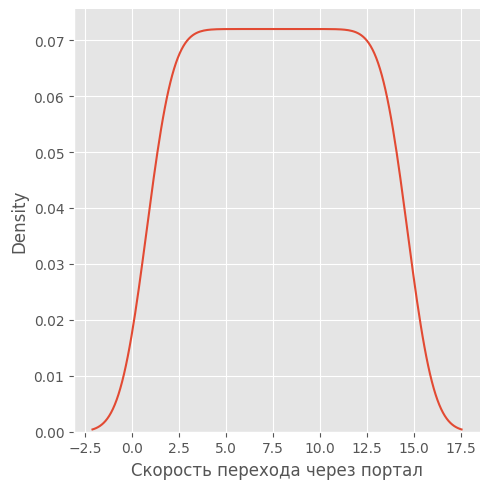

In [138]:
sns.displot(df['Скорость перехода через портал'], kind="kde", bw_adjust=2)

<Axes: >

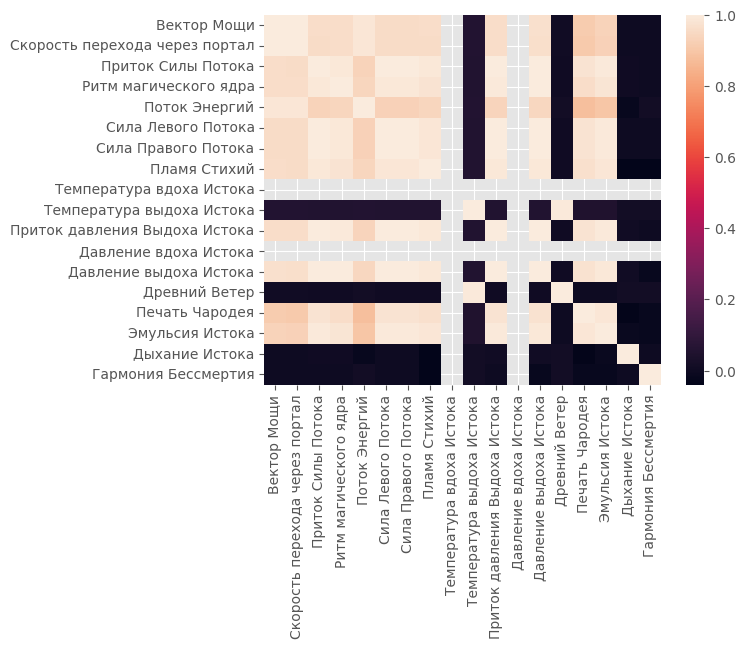

In [140]:
sns.heatmap(corr_matrix)

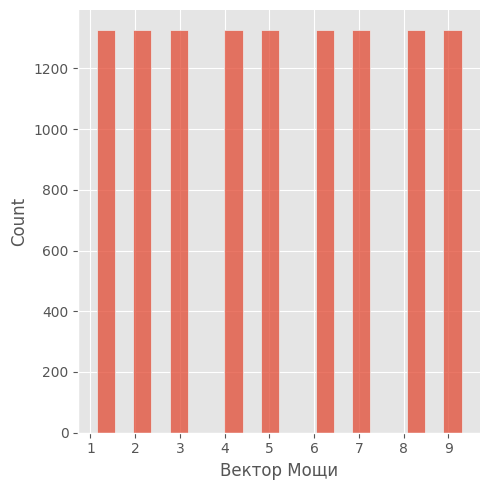

In [116]:
sns.displot(df['Вектор Мощи'], bins=20)

<Axes: >

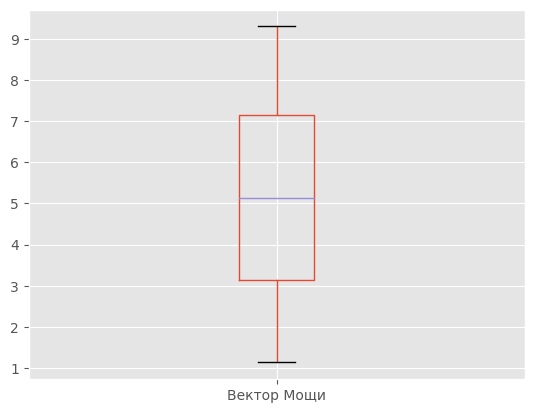

In [94]:
df.boxplot(column=['Вектор Мощи'])

<Axes: >

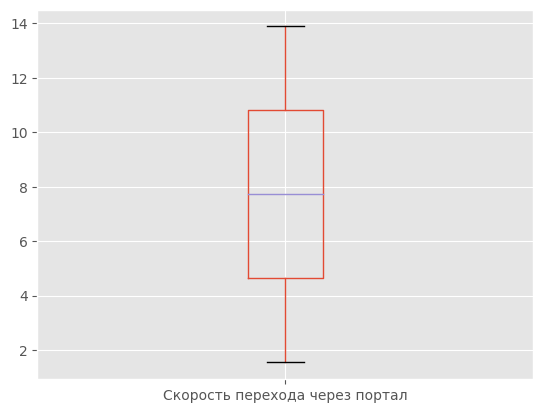

In [95]:
df.boxplot(column=['Скорость перехода через портал'])

<Axes: >

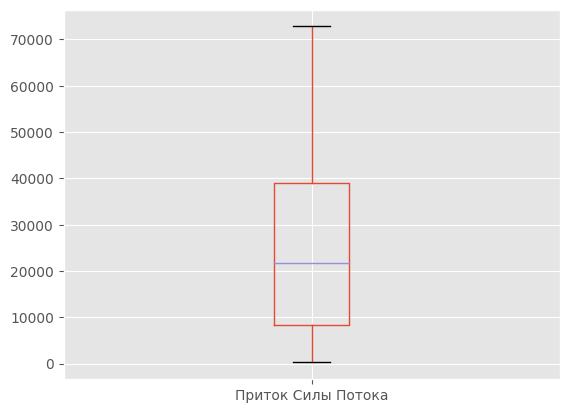

In [96]:
df.boxplot(column=['Приток Силы Потока'])

<Axes: >

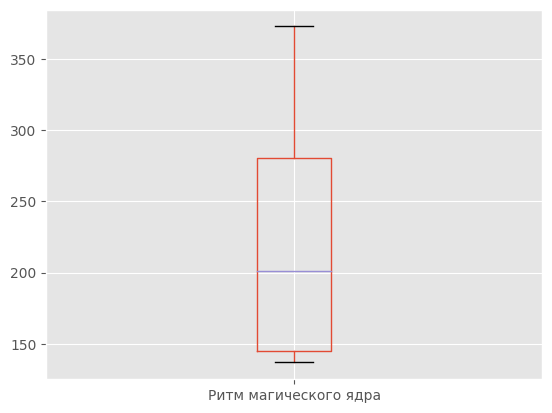

In [97]:
df.boxplot(column=['Ритм магического ядра'])

<Axes: >

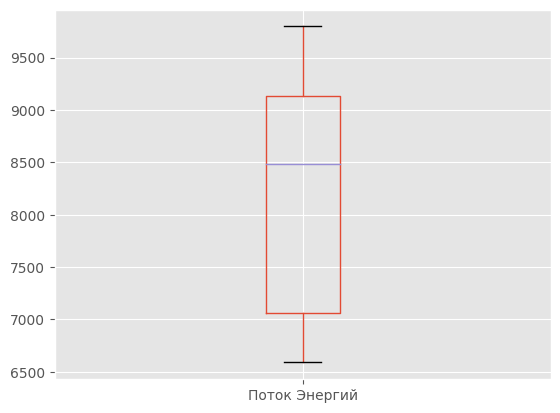

In [98]:
df.boxplot(column=['Поток Энергий'])

<Axes: >

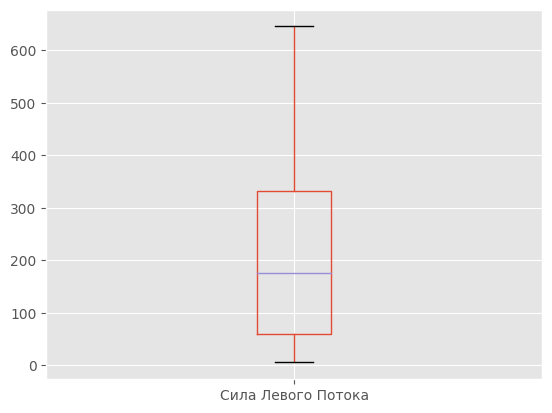

In [99]:
df.boxplot(column=['Сила Левого Потока'])

<Axes: >

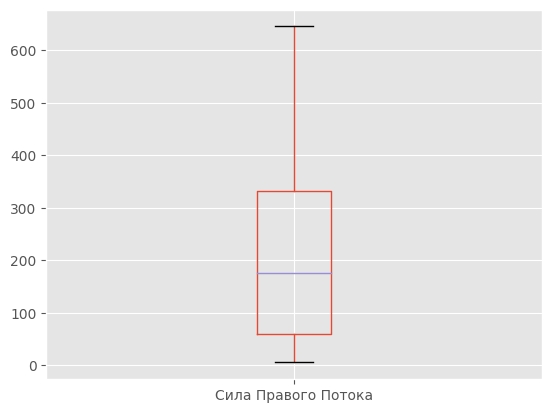

In [100]:
df.boxplot(column=['Сила Правого Потока'])

<Axes: >

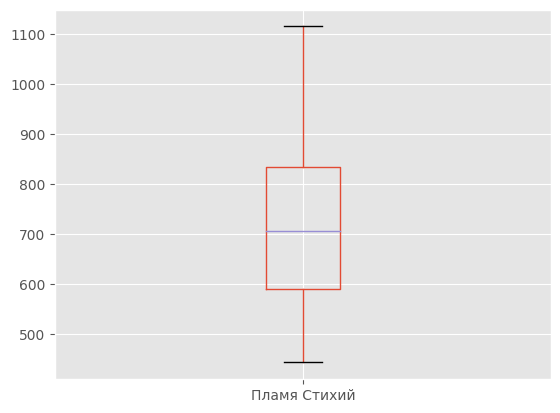

In [101]:
df.boxplot(column=['Пламя Стихий'])

<Axes: >

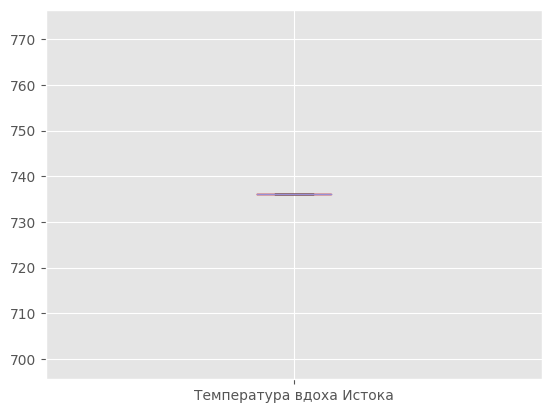

In [102]:
df.boxplot(column=['Температура вдоха Истока'])

<Axes: >

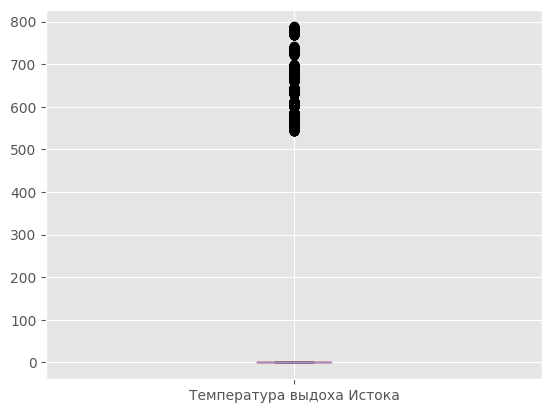

In [103]:
df.boxplot(column=['Температура выдоха Истока'])

<Axes: >

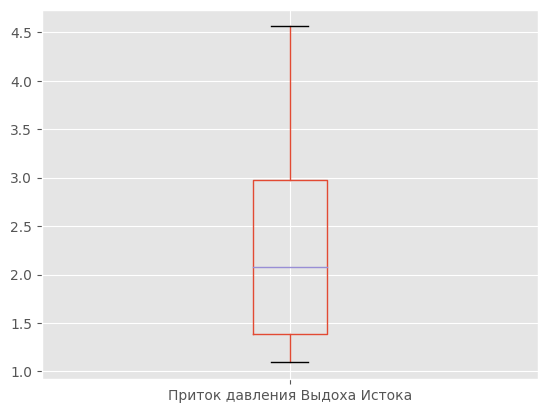

In [104]:
df.boxplot(column=['Приток давления Выдоха Истока'])

<Axes: >

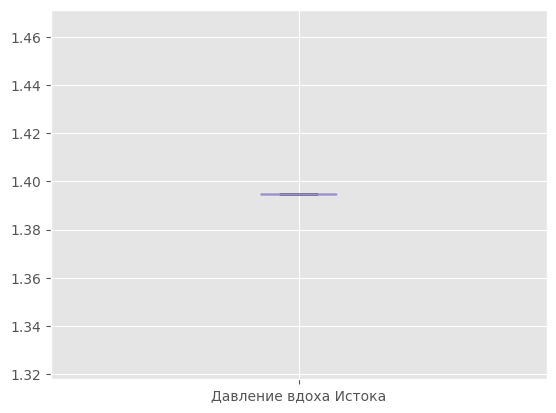

In [105]:
df.boxplot(column=['Давление вдоха Истока'])

<Axes: >

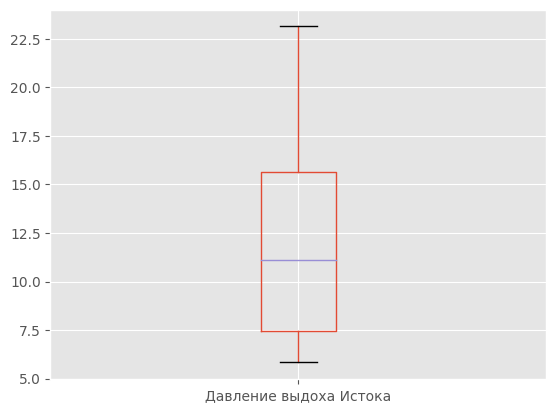

In [106]:
df.boxplot(column=['Давление выдоха Истока'])

<Axes: >

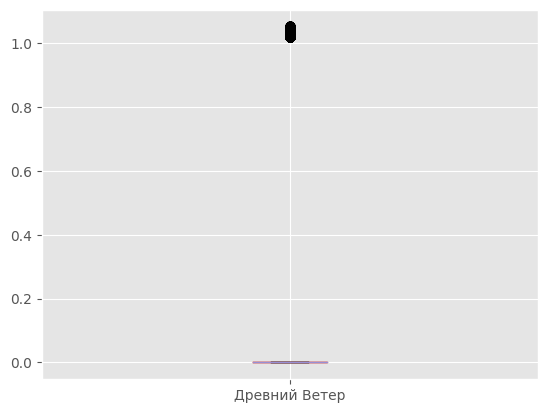

In [107]:
df.boxplot(column=['Древний Ветер'])

<Axes: >

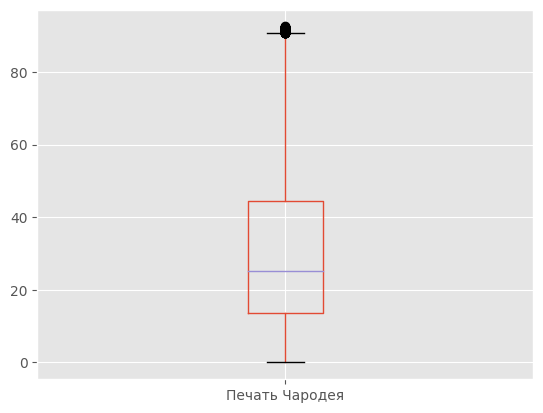

In [108]:
df.boxplot(column=['Печать Чародея'])

<Axes: >

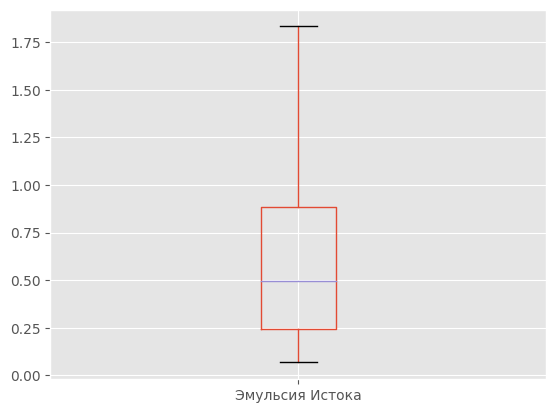

In [109]:
df.boxplot(column=['Эмульсия Истока'])

<Axes: >

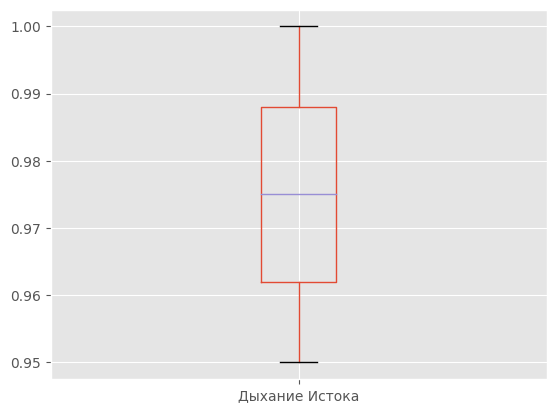

In [110]:
df.boxplot(column=['Дыхание Истока'])

<Axes: >

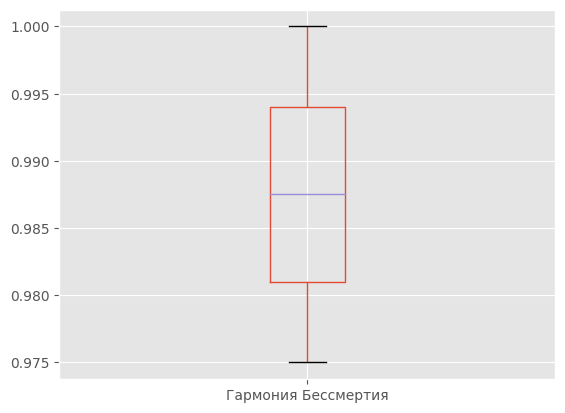

In [111]:
df.boxplot(column=['Гармония Бессмертия'])

In [58]:
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,1.394603,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,Исток не вернул выдох,2.512,1.394603,13.109,Древний Ветер развеялся,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,1.394603,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,Исток не вернул выдох,3.594,1.394603,18.293,Древний Ветер развеялся,58.064,1.149,1.00,1.000


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Вектор Мощи - 0%
Скорость перехода через портал - 0%
Приток Силы Потока - 0%
Ритм магического ядра - 0%
Поток Энергий - 0%
Сила Левого Потока - 0%
Сила Правого Потока - 0%
Пламя Стихий - 0%
Температура вдоха Истока - 0%
Температура выдоха Истока - 0%
Приток давления Выдоха Истока - 0%
Давление вдоха Истока - 0%
Давление выдоха Истока - 0%
Древний Ветер - 0%
Печать Чародея - 0%
Эмульсия Истока - 0%
Дыхание Истока - 0%
Гармония Бессмертия - 0%


In [5]:
data.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,7.716600,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,1.394603e+00,12.297123,33.641261,0.662440,0.97500,0.9875
std,2.626388,3.985002,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,2.220539e-16,5.337448,25.841363,0.507132,0.01472,0.0075
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,1.394603e+00,5.828000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,1.394603e+00,7.447250,13.677500,0.246000,0.96200,0.9810
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,1.394603e+00,11.092000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,1.394603e+00,15.658000,44.552500,0.882000,0.98800,0.9940
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,1.394603e+00,23.140000,92.556000,1.832000,1.00000,1.0000
